<a href="https://colab.research.google.com/github/samj-ai/composition/blob/main/Szpakowkski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Szpakowski

https://www.theparisreview.org/blog/2017/02/15/rhythmical-lines/  
  
  
<img src="https://drive.google.com/uc?id=1ualyEj29FXNLLPZ9g6C_BSX9pm_457Qf" width="500" height="300" alt="Image description">

In [ ]:
from dataclasses import dataclass

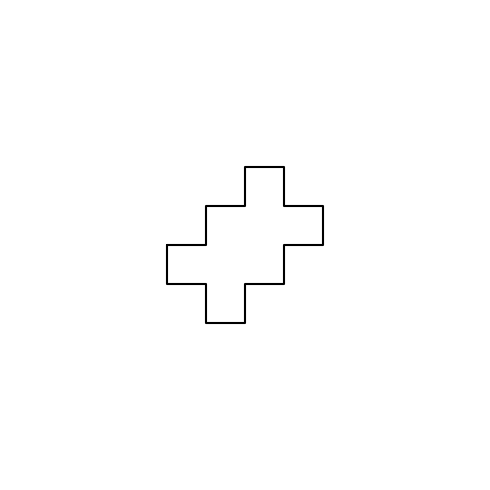

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_szpakowski_line(path,
    line_width=1,
    grid_size=20,
    figsize=(5, 5)
    ):
    """
    Draw a single continuous line with 90-degree turns.

    Parameters:
    - path: List of (x, y) coordinates to visit in order
    - line_width (optional): Width of the line
    - grid_size (optional): Size of the grid (higher = more pixelated)
    """
    # Create figure with white background and no axes
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')

    # Convert path to arrays for plotting
    path = np.array(path)
    x, y = path[:, 0], path[:, 1]

    # Plot the single continuous line
    ax.plot(x, y, 'k-', linewidth=line_width, solid_capstyle='round')

    # Set equal aspect ratio and remove axes
    ax.set_aspect('equal')
    ax.axis('off')

    # Set limits with some padding
    padding = grid_size * 0.1
    ax.set_xlim(min(x) - padding, max(x) + padding)
    ax.set_ylim(min(y) - padding, max(y) + padding)

    # Show light grid if desired (comment out for final version)
    ax.grid(True, linestyle=':', alpha=0.9)

    plt.tight_layout()
    return fig

# Example: Create a simple Szpakowski-inspired pattern
# Path is a series of (x,y) coordinates
path = [(0, 0)]
current = path[0]
step_size = 1

# Create a meandering pattern with only 90-degree turns
moves = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # right, up, left, down
pattern = [0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 2, 3, 2, 1, 2, 1]  # sequence of move indices

for move_idx in pattern:
    dx, dy = moves[move_idx]
    current = (current[0] + dx * step_size, current[1] + dy * step_size)  # Scale by 5 for visibility
    path.append(current)

# Draw the pattern
fig = draw_szpakowski_line(path, line_width=1.5, grid_size=40)
plt.show()

In [ ]:
def create_szpakowski_system(max_depth=3):
    # Define a library of pattern subroutines
    patterns = {
        'meander': lambda x, y, scale: meander_pattern(x, y, scale),
        'zigzag': lambda x, y, scale: zigzag_pattern(x, y, scale),
        'spiral': lambda x, y, scale: spiral_pattern(x, y, scale),
        # etc.
    }

    # Rules for composition and transition between patterns
    def compose(x, y, scale, depth=0):
        if depth >= max_depth:
            return []

        path = []
        # Choose pattern based on position/context
        if x % 2 == 0 and y % 2 == 0:
            path.extend(patterns['meander'](x, y, scale))
            # Position after completing meander
            next_x, next_y = x + scale*5, y
            # Recursively compose with another pattern
            path.extend(compose(next_x, next_y, scale*0.8, depth+1))
        else:
            path.extend(patterns['zigzag'](x, y, scale))
            # etc.

        return path

In [ ]:
def meander_pattern(start_pos=(0,0), scale=1, iterations=1):
    path = [start_pos]
    pass

def symmetric_spiral(start_pos=(0,0), scale=1, iterations=3):
    path = [start_pos]
    path.append(start_pos + moves.d)
    step_size = scale
    # grow from either end of starting path segment (length 1)
    # beginning must break symmetry
    next = [(moves.u, moves.d), (moves.d, moves.l)]
    for i in iterations:
        path.prepend(path[0] + moves.l)
        path.append(path[-1] + moves.r)
        step_size += i + 1
        path.append()


def create_pattern(pattern_type, start_pos, scale, direction):
    """Generate coordinates for different pattern types"""
    path = [start_pos]
    x, y = start_pos

    if pattern_type == "meander":
        # Create horizontal meander pattern
        for i in range(5):
            # Move right
            x += scale
            path.append((x, y))
            # Up or down depending on position
            delta_y = scale if i % 2 == 0 else -scale
            y += delta_y
            path.append((x, y))

    elif pattern_type == "zigzag":
        # Create zigzag pattern
        # ...etc
        pass

    return path, (x, y)  # Return path and end position

def compose_drawing(canvas_size, scale):
    """Create full drawing by composing patterns"""
    full_path = [(0, 0)]
    position = (0, 0)

    # First pattern
    new_segment, position = create_pattern("meander", position, scale, "right")
    full_path.extend(new_segment[1:])  # Skip first point to avoid duplication

    # Second pattern
    new_segment, position = create_pattern("zigzag", position, scale/2, "up")
    full_path.extend(new_segment[1:])

    # Apply transformations or compose recursively
    # ...

    return full_path

# Experiment with Dictionary Implementation

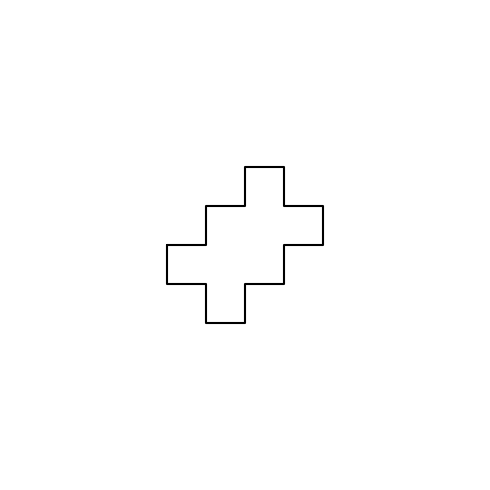

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_szpakowski_line(path,
    line_width=1,
    grid_size=20,
    figsize=(5, 5)
    ):
    """
    Draw a single continuous line with 90-degree turns.

    Parameters:
    - path: List of (x, y) coordinates to visit in order
    - line_width (optional): Width of the line
    - grid_size (optional): Size of the grid (higher = more pixelated)
    """
    # Create figure with white background and no axes
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')

    # Convert path to arrays for plotting
    path = np.array(path)
    x, y = path[:, 0], path[:, 1]

    # Plot the single continuous line
    ax.plot(x, y, 'k-', linewidth=line_width, solid_capstyle='round')

    # Set equal aspect ratio and remove axes
    ax.set_aspect('equal')
    ax.axis('off')

    # Set limits with some padding
    padding = grid_size * 0.1
    ax.set_xlim(min(x) - padding, max(x) + padding)
    ax.set_ylim(min(y) - padding, max(y) + padding)

    # Show light grid if desired (comment out for final version)
    ax.grid(True, linestyle=':', alpha=0.9)

    plt.tight_layout()
    return fig

# Example: Create a simple Szpakowski-inspired pattern
# Path is a series of (x,y) coordinates
path = [(0, 0)]
current = path[0]
step_size = 1

# Create a meandering pattern with only 90-degree turns
moves = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # right, up, left, down
pattern = [0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 2, 3, 2, 1, 2, 1]  # sequence of move indices

for move_idx in pattern:
    dx, dy = moves[move_idx]
    current = (current[0] + dx * step_size, current[1] + dy * step_size)  # Scale by 5 for visibility
    path.append(current)

# Draw the pattern
fig = draw_szpakowski_line(path, line_width=1.5, grid_size=40)
plt.show()

In [21]:
# Define a Point as a simple tuple (x, y)
# A Path is a list of Points

# Primitive movement functions
def move_right(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0] + i + 1, last_point[1]) for i in range(steps)]
    return path + new_points

def move_left(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0] - i - 1, last_point[1]) for i in range(steps)]
    return path + new_points

def move_up(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0], last_point[1] - i - 1) for i in range(steps)]
    return path + new_points

def move_down(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0], last_point[1] + i + 1) for i in range(steps)]
    return path + new_points

# Pattern composition functions
def square(path, size=3):
    path = move_right(path, size)
    path = move_down(path, size)
    path = move_left(path, size)
    path = move_up(path, size)
    return path

def zigzag(path, width=3, height=2, count=3):
    for _ in range(count):
        path = move_right(path, width)
        path = move_down(path, height)
        path = move_right(path, width)
        path = move_up(path, height)
    return path

def zigzag(path, width=3, height=2, count=3, step=None):
    for _ in range(count):
        path = move_right(path, width)
        path = move_down(path, height)
        path = move_right(path, width)
        path = move_up(path, height)
    return path

# Helper functions
def start_at(x=0, y=0):
    return [(x, y)]

# Higher-order function for combining patterns
def then(path_fn1, path_fn2):
    def combined(path):
        return path_fn2(path_fn1(path))
    return combined

# Complex pattern through composition
def fancy_pattern(path):
    # Define a pattern as a function composition
    pattern = then(
        lambda p: square(p, 5),
        lambda p: zigzag(p[:-1], 1, 1, 2)  # Remove last point to avoid overlap
    )
    return pattern(path)

In [23]:
# make the path
path = [(0, 0)]
path = fancy_pattern(path)

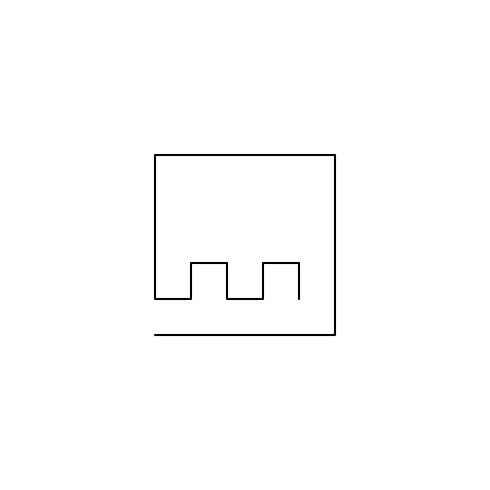

In [24]:
# Draw the pattern
fig = draw_szpakowski_line(path, line_width=1.5, grid_size=40)
plt.show()

# Experiment with primitives and facets

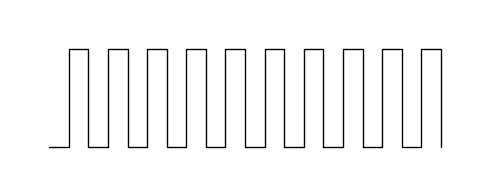

In [25]:
path = [(0,0)]
path = zigzag(path, 1, 5, 10)

fig = draw_szpakowski_line(path)
plt.show()

In [ ]:
def meander_pattern(start_pos=(0,0), scale=1, iterations=1):
    path = [start_pos]
    pass

def symmetric_spiral(start_pos=(0,0), scale=1, iterations=3):
    path = [start_pos]
    path.append(start_pos + moves.d)
    step_size = scale
    # grow from either end of starting path segment (length 1)
    # beginning must break symmetry
    next = [(moves.u, moves.d), (moves.d, moves.l)]
    for i in iterations:
        path.prepend(path[0] + moves.l)
        path.append(path[-1] + moves.r)
        step_size += i + 1
        path.append()


In [26]:
# Define a class to represent a primitive drawing operation
class DrawOperation:
    def __init__(self, operation, args=None, kwargs=None):
        self.operation = operation
        self.args = args or []
        self.kwargs = kwargs or {}

    def execute(self, path, context=None):
        # Clone the arguments to avoid modifying the original
        args = self.args.copy()
        kwargs = self.kwargs.copy()

        # Evaluate any expressions in the arguments
        if context:
            for k, v in kwargs.items():
                if isinstance(v, str) and v.startswith('expr:'):
                    expression = v[5:]
                    kwargs[k] = eval(expression, globals(), context)

        # Apply the operation
        return self.operation(path, *args, **kwargs)

# Pattern class to maintain a queue of operations
class Pattern:
    def __init__(self, name=None):
        self.operations = []
        self.name = name

    def add(self, operation, *args, **kwargs):
        self.operations.append(DrawOperation(operation, args, kwargs))
        return self

    def __call__(self, path, **context):
        result = path
        for op in self.operations:
            result = op.execute(result, context)
        return result

    def articulate(self, modifications):
        """
        Create a new pattern with modified operations.

        modifications is a list of (index, kwarg_dict) pairs
        where index is the operation index to modify (0-based)
        and kwarg_dict contains the parameters to modify
        """
        new_pattern = Pattern(f"articulated_{self.name}" if self.name else None)

        # Copy all operations, applying modifications
        mod_dict = dict(modifications)
        for i, op in enumerate(self.operations):
            new_op = DrawOperation(op.operation, op.args.copy())

            # Apply modifications if this index is in the modification list
            if i in mod_dict:
                new_op.kwargs = {**op.kwargs, **mod_dict[i]}
            else:
                new_op.kwargs = op.kwargs.copy()

            new_pattern.operations.append(new_op)

        return new_pattern

Regular zigzag:


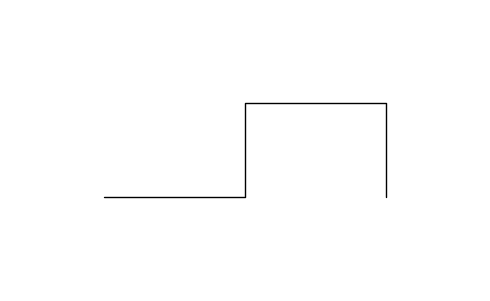


Diminishing zigzag:


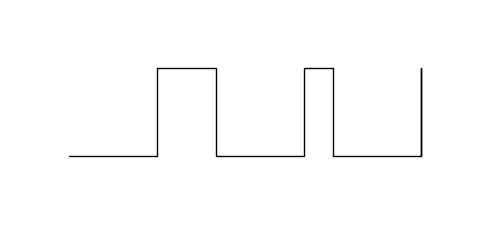


Spiral zigzag:


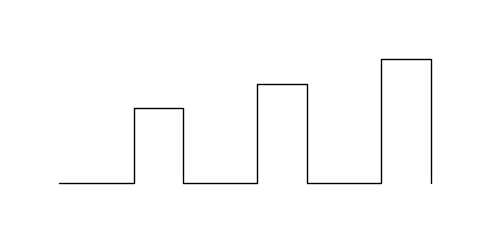

In [29]:
# Primitive operations
def move_right(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0] + i + 1, last_point[1]) for i in range(steps)]
    return path + new_points

def move_left(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0] - i - 1, last_point[1]) for i in range(steps)]
    return path + new_points

def move_up(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0], last_point[1] - i - 1) for i in range(steps)]
    return path + new_points

def move_down(path, steps=1):
    last_point = path[-1]
    new_points = [(last_point[0], last_point[1] + i + 1) for i in range(steps)]
    return path + new_points

# Helper functions
def start_at(x=0, y=0):
    return [(x, y)]

# Note: simple path tool for drawing to
def draw_path(path, width=20, height=20):
    grid = [[' ' for _ in range(width)] for _ in range(height)]

    for x, y in path:
        if 0 <= x < width and 0 <= y < height:
            grid[y][x] = 'X'

    for row in grid:
        print(''.join(row))

    return path

# Define patterns using the Pattern class
zigzag = Pattern("zigzag")
zigzag.add(move_right, steps=3)
zigzag.add(move_down, steps=2)
zigzag.add(move_right, steps=3)
zigzag.add(move_up, steps=2)

# Create a compound pattern that applies zigzag multiple times
def create_multi_zigzag(count=3):
    multi_zigzag = Pattern("multi_zigzag")

    for i in range(count):
        # Add context variables that can be used in expressions
        multi_zigzag.add(zigzag, **{'i': i})

    return multi_zigzag

# Example: Create an articulated zigzag where height decreases
diminishing_zigzag = zigzag.articulate([
    (1, {'steps': 'expr:3'}),           # First operation (move_right)
    (2, {'steps': 'expr:2 - i'}),       # Second operation (move_down)
    (3, {'steps': 'expr:3'}),           # Third operation (move_right)
    (4, {'steps': 'expr:2 - i'})        # Fourth operation (move_up)
])

# Create a multi-pattern with the articulated zigzag
multi_diminishing = create_multi_zigzag()

# Example usage
if __name__ == "__main__":
    # Regular zigzag
    print("Regular zigzag:")
    path = zigzag(start_at(2, 2))
    fig = draw_szpakowski_line(path)
    plt.show()

    # Diminishing zigzag
    print("\nDiminishing zigzag:")
    path = start_at(2, 2)
    for i in range(3):
        path = diminishing_zigzag(path, i=i)
    fig = draw_szpakowski_line(path)
    plt.show()

    # You can also apply advanced articulations:
    spiral_zigzag = zigzag.articulate([
        (1, {'steps': 'expr:3 + i'}),  # Increasing width
        (2, {'steps': 'expr:2'}),
        (3, {'steps': 'expr:3 + i'}),  # Increasing width
        (4, {'steps': 'expr:2'})
    ])

    print("\nSpiral zigzag:")
    path = start_at(2, 2)
    for i in range(3):
        path = spiral_zigzag(path, i=i)
    fig = draw_szpakowski_line(path)
    plt.show()

In [30]:
# Combine patterns sequentially
def sequence(*patterns):
    combined = Pattern("sequence")
    for pattern in patterns:
        combined.add(pattern)
    return combined

# Repeat a pattern multiple times
def repeat(pattern, count=3):
    repeated = Pattern(f"repeat_{pattern.name}")
    for i in range(count):
        repeated.add(pattern, i=i)
    return repeated

# More complex example
square = Pattern("square")
square.add(move_right, steps=5)
square.add(move_down, steps=5)
square.add(move_left, steps=5)
square.add(move_up, steps=5)

# Complex pattern through composition
fancy_pattern = sequence(
    square,
    repeat(zigzag.articulate([
        (1, {'steps': 'expr:i + 1'}),
        (3, {'steps': 'expr:i + 1'})
    ]), 3)
)

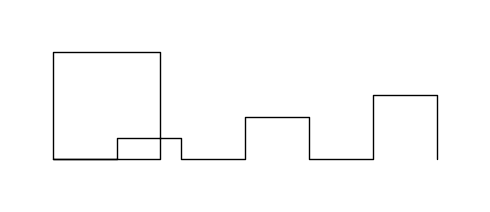

In [31]:
# tests
path = fancy_pattern(start_at(0,0))
fig = draw_szpakowski_line(path)
plt.show()

In [ ]:
# steps
fancy_pattern = sequence(
    square,
    repeat(zigzag.articulate([
        (1, {'steps': 'expr:i + 1'}),
        (3, {'steps': 'expr:i + 1'})
    ]), 3)
)